# Week4 Evaluation

## Highlights
🌟 Accuracy Can Be Misleading: Accuracy is a commonly used metric to evaluate the performance of classification models. It represents the ratio of correctly predicted instances to the total instances. However, it can be misleading in cases where the dataset is imbalanced (one class dominates the other), as a high accuracy score can be achieved by simply predicting the dominant class. It's important to consider other metrics in such cases.

🌟 ROC Curve (Receiver Operating Characteristic Curve): The ROC curve is a graphical representation that shows the trade-off between the true positive rate (TPR, also known as recall) and the false positive rate (FPR) at various threshold settings for a binary classification model. It helps assess the model's ability to discriminate between the positive and negative classes. A model with a higher area under the ROC curve (AUC-ROC) is generally considered better at classification.

🌟 KFold Cross-Validation: K-Fold cross-validation is a technique used to assess a model's performance by splitting the dataset into K subsets (folds), training the model on K-1 of them, and testing it on the remaining fold. This process is repeated K times, with each fold serving as the test set once. It provides a more reliable estimate of a model's performance, reducing the risk of overfitting or underfitting to a specific dataset split.

🌟 F1 Score: The F1 score is a metric that combines precision (P) and recall (R) into a single value. Precision measures the proportion of true positive predictions among all positive predictions, while recall measures the proportion of true positive predictions among all actual positives. The F1 score is the harmonic mean of precision and recall and is particularly useful when you want to balance precision and recall in your model's performance. It's especially valuable when dealing with imbalanced datasets.

In machine learning, it's essential to consider a combination of metrics, depending on the specific problem and dataset characteristics, to get a comprehensive understanding of a model's performance. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# get data (only run once)
# data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
# !wget $data

In [4]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
# only choose certain columns
selected_df = df[
    [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP"
    ]
].copy()
selected_df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [6]:
# format the df
selected_df.columns = selected_df.columns.str.replace(" ", "_").str.lower()
selected_df_columns = list(selected_df.dtypes.index)

for c in selected_df_columns:
    if selected_df[c].dtype == "object":
        selected_df[c] = selected_df[c].str.lower().str.replace(" ", "_")

selected_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [7]:
selected_df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [8]:
# fill in 0
selected_df.fillna(0, inplace=True)
selected_df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [9]:
# make a new variable as our binary target variable
selected_df["above_average"] = (selected_df["msrp"] > selected_df["msrp"].mean()).astype(int)
selected_df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920,1


In [10]:
# split the data
from sklearn.model_selection import train_test_split
selected_df_full_train, selected_df_test = train_test_split(selected_df, test_size=0.2, random_state=1)
selected_df_train, selected_df_val = train_test_split(selected_df_full_train, test_size=0.25, random_state=1)

In [11]:
len(selected_df_train), len(selected_df_val), len(selected_df_test)

(7148, 2383, 2383)

In [12]:
# reset index
selected_df_train = selected_df_train.reset_index(drop=True)
selected_df_val = selected_df_val.reset_index(drop=True)
selected_df_test = selected_df_test.reset_index(drop=True)

In [13]:
# get y target value
y_train = selected_df_train["above_average"].values
y_val = selected_df_val["above_average"].values
y_test = selected_df_test["above_average"].values

In [14]:
# drop the target value from dataset
del selected_df_train["msrp"]
del selected_df_val["msrp"]
del selected_df_test["msrp"]
del selected_df_train["above_average"]
del selected_df_val["above_average"]
del selected_df_test["above_average"]

selected_df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17
...,...,...,...,...,...,...,...,...,...
7143,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24
7144,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17
7145,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32
7146,audi,200,1991,162.0,5.0,automatic,sedan,20,16


In [15]:
selected_df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

Q1 Which numerical variable (among the following 4) has the highest AUC?
- **engine_hp**
- engine_cylinders
- highway_mpg
- city_mpg

In [16]:
from sklearn.metrics import roc_auc_score

for n in ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]:
    auc = roc_auc_score(y_train, selected_df_train[n])
    print(f"auc_{n}: {auc}")

auc_engine_hp: 0.9171031265539011
auc_engine_cylinders: 0.766116490165669
auc_highway_mpg: 0.3669412128227987
auc_city_mpg: 0.3265755356754767


Q2 What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- **0.979**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

all_columns = list(selected_df_train.dtypes.index)

def train(df_train, y_train, C=1.0):
    dicts = df_train[all_columns].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver="liblinear", C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

dv, model = train(selected_df_train, y_train)

def predit(df, dv, model):
    dicts_val = df[all_columns].to_dict(orient="records")
    X_val = dv.transform(dicts_val)
    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred

y_pred = predit(selected_df_val, dv, model)
auc_val = roc_auc_score(y_val, y_pred)
auc_val

0.9803867466832218

Q3 At which threshold precision and recall curves intersect?
- 0.28
- **0.48**
- 0.68
- 0.88

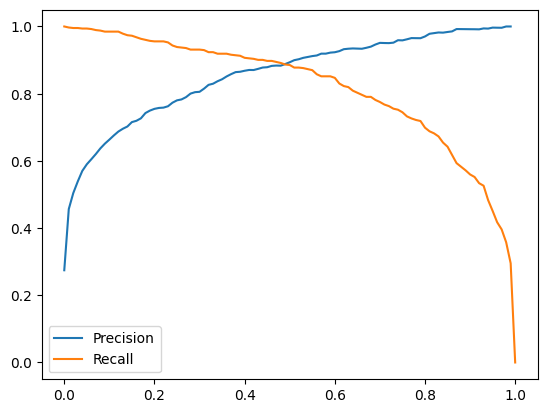

In [18]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, tn, fp, fn))

columns = ["threshold", "tp", "tn", "fp", "fn"]
selected_df_val_new = pd.DataFrame(scores, columns=columns)
selected_df_val_new["precision"] = selected_df_val_new.tp / (selected_df_val_new.tp + selected_df_val_new.fp)
selected_df_val_new["recall"] = selected_df_val_new.tp / (selected_df_val_new.tp + selected_df_val_new.fn)

# selected_df_train
plt.plot(selected_df_val_new.threshold, selected_df_val_new["precision"], label="Precision")
plt.plot(selected_df_val_new.threshold, selected_df_val_new["recall"], label="Recall")
plt.legend()


Q4 This is the formula for computing F1:

 F1 = 2 * (P*R / (P+R))

Where 
 P is precision and 
 R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- **0.52**
- 0.72

In [19]:
selected_df_val_new["f1"] = 2 * selected_df_val_new.precision * selected_df_val_new.recall / (selected_df_val_new.precision + selected_df_val_new.recall)
columns = ["threshold", "tp", "tn", "fp", "fn", "f1"]
# selected_df_val = pd.DataFrame(scores, columns=columns)

selected_df_val_new.fillna(0, inplace=True)
selected_df_val_new

,threshold,tp,tn,fp,fn,precision,recall,f1
0,0.00,654,0,1729,0,0.274444,1.000000,0.430688
1,0.01,652,953,776,2,0.456583,0.996942,0.626321
2,0.02,651,1089,640,3,0.504260,0.995413,0.669409
3,0.03,651,1172,557,3,0.538907,0.995413,0.699248
4,0.04,650,1239,490,4,0.570175,0.993884,0.724638
...,...,...,...,...,...,...,...,...
96,0.96,273,1728,1,381,0.996350,0.417431,0.588362
97,0.97,259,1728,1,395,0.996154,0.396024,0.566740
98,0.98,234,1729,0,420,1.000000,0.357798,0.527027
99,0.99,193,1729,0,461,1.000000,0.295107,0.455726


In [20]:
new_threholds = [0.12, 0.32, 0.52, 0.72]

for i in new_threholds:
    result = selected_df_val_new[selected_df_val_new.threshold == i]["f1"]
    print(f"threshold {i}: f1 {result}")


threshold 0.12: f1 12    0.809554
Name: f1, dtype: float64
threshold 0.32: f1 32    0.872202
Name: f1, dtype: float64
threshold 0.52: f1 52    0.889922
Name: f1, dtype: float64
threshold 0.72: f1 72    0.84648
Name: f1, dtype: float64


Q5 How large is standard devidation of the scores across different folds?
- **0.003**
- 0.030
- 0.090
- 0.140

In [21]:
selected_df_full_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
2711,mercedes-benz,clk-class,2007,382.0,8.0,automatic,coupe,22,15,54900,1
333,nissan,370z,2016,332.0,6.0,manual,coupe,26,18,29990,0
9377,gmc,sierra_1500,2017,285.0,6.0,automatic,extended_cab_pickup,24,18,32230,0
939,porsche,911,2016,350.0,6.0,manual,convertible,26,19,102930,1
5675,volkswagen,gti,2013,200.0,4.0,manual,4dr_hatchback,31,21,28795,0
...,...,...,...,...,...,...,...,...,...,...,...
7813,audi,q5,2016,272.0,6.0,automatic,4dr_suv,26,18,53500,1
10955,toyota,tundra,2015,381.0,8.0,automatic,crew_cab_pickup,17,13,47975,1
905,saab,900,1997,150.0,4.0,manual,4dr_hatchback,26,18,2000,0
5192,pontiac,g6,2009,164.0,4.0,automatic,coupe,33,22,22220,0


In [22]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores  = []

for train_idx, val_idx in kfold.split(selected_df_full_train):
    selected_df_train_kfold = selected_df_full_train.iloc[train_idx]
    selected_df_val_kfold = selected_df_full_train.iloc[val_idx]

    y_train_kfold = selected_df_train_kfold["above_average"].values
    y_val_kfold = selected_df_val_kfold["above_average"].values

    dv_kfold, model_kfold = train(selected_df_train_kfold, y_train_kfold)
    y_pred_kfold = predit(selected_df_val_kfold, dv_kfold, model_kfold)

    auc_kfold = roc_auc_score(y_val_kfold, y_pred_kfold)
    scores.append(auc_kfold)

print(np.std(scores))

0.002827523791056883


Q6 Now let's use 5-Fold cross-validation to find the best parameter C

Which C leads to the best mean score?

- 0.01
- 0.1
- 0.5
- **10**

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores  = []

    for train_idx, val_idx in kfold.split(selected_df_full_train):
        selected_df_train_kfold = selected_df_full_train.iloc[train_idx]
        selected_df_val_kfold = selected_df_full_train.iloc[val_idx]

        y_train_kfold = selected_df_train_kfold["above_average"].values
        y_val_kfold = selected_df_val_kfold["above_average"].values

        dv_kfold, model_kfold = train(selected_df_train_kfold, y_train_kfold, C=C)
        y_pred_kfold = predit(selected_df_val_kfold, dv_kfold, model_kfold)

        auc_kfold = roc_auc_score(y_val_kfold, y_pred_kfold)
        scores.append(auc_kfold)

    print("C=%4s %.3f +- %.3f" % (C, np.mean(scores), np.std(scores)))

C=0.01 0.952 +- 0.002
C= 0.1 0.972 +- 0.001
C= 0.5 0.979 +- 0.002
C=  10 0.983 +- 0.003
